# CH8 Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## MLiA

### (LR) Linear Regression

In [2]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split("\t"))
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split("\t")
        for i in range(numFeat-1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [3]:
def standRegres(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I*(xMat.T*yMat)
    return ws

In [4]:
xArr, yArr = loadDataSet("./Data/CH8/ex0.txt")
print(xArr,yArr)

[[1.0, 0.067732], [1.0, 0.42781], [1.0, 0.995731], [1.0, 0.738336], [1.0, 0.981083], [1.0, 0.526171], [1.0, 0.378887], [1.0, 0.033859], [1.0, 0.132791], [1.0, 0.138306], [1.0, 0.247809], [1.0, 0.64827], [1.0, 0.731209], [1.0, 0.236833], [1.0, 0.969788], [1.0, 0.607492], [1.0, 0.358622], [1.0, 0.147846], [1.0, 0.63782], [1.0, 0.230372], [1.0, 0.070237], [1.0, 0.067154], [1.0, 0.925577], [1.0, 0.717733], [1.0, 0.015371], [1.0, 0.33507], [1.0, 0.040486], [1.0, 0.212575], [1.0, 0.617218], [1.0, 0.541196], [1.0, 0.045353], [1.0, 0.126762], [1.0, 0.556486], [1.0, 0.901144], [1.0, 0.958476], [1.0, 0.274561], [1.0, 0.394396], [1.0, 0.87248], [1.0, 0.409932], [1.0, 0.908969], [1.0, 0.166819], [1.0, 0.665016], [1.0, 0.263727], [1.0, 0.231214], [1.0, 0.552928], [1.0, 0.047744], [1.0, 0.365746], [1.0, 0.495002], [1.0, 0.493466], [1.0, 0.792101], [1.0, 0.76966], [1.0, 0.251821], [1.0, 0.181951], [1.0, 0.808177], [1.0, 0.334116], [1.0, 0.33863], [1.0, 0.452584], [1.0, 0.69477], [1.0, 0.590902], [1.0

In [5]:
ws = standRegres(xArr,yArr)
ws

matrix([[3.00774324],
        [1.69532264]])

In [6]:
xMat = np.mat(xArr)
yMat = np.mat(yArr)
yHat = xMat*ws

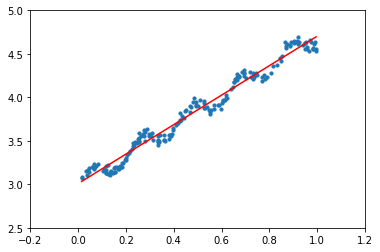

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0],s=10)
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy*ws
ax.plot(xCopy[:,1],yHat,c="red")
plt.xlim(-0.2,1.2)
plt.ylim(2.5,5)
plt.show()

In [8]:
# 之前sort过
yHat = xMat*ws
np.corrcoef(yHat.T,yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

### (LWLR) Locally Weighted Linear Regression

In [75]:
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))
    for j in range(m):                      #next 2 lines create weights matrix
        diffMat = testPoint - xMat[j,:]     #
        weights[j,j] = np.exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)

    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    print(np.shape(ws),np.shape(xTx),np.shape(xMat.T),np.shape(weights),np.shape(xMat),np.shape(yMat))

    return testPoint * ws

In [43]:
def lwlrTest(testArr,xArr,yArr,k=1.0):  #loops over all the data points and applies lwlr to each one
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

In [76]:
lwlr(xArr[0],xArr,yArr,1.0)


(2, 1) (2, 2) (2, 200) (200, 200) (200, 2) (200, 1)


matrix([[3.12204471]])

In [12]:
yHat = lwlrTest(xArr,xArr,yArr,0.003)

In [13]:
def lwlrTestPlot(xArr,yArr,k=1.0):  #same thing as lwlrTest except it sorts X first
    yHat = np.zeros(np.shape(yArr))       #easier for plotting
    xCopy = np.mat(xArr)
    xCopy.sort(0)
    for i in range(np.shape(xArr)[0]):
        yHat[i] = lwlr(xCopy[i],xArr,yArr,k)
    return yHat,xCopy

In [14]:
xMat = np.mat(xArr)
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]

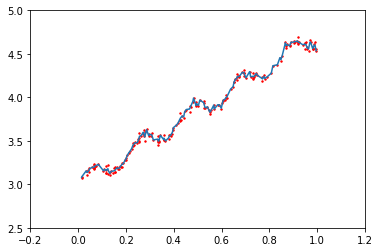

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0],np.mat(yArr).T.flatten().A[0],s=2,c="red")
plt.xlim(-0.2,1.2)
plt.ylim(2.5,5)
plt.show()

### EX : Abalone

In [16]:
def rssError(yArr, yHatArr):
    return ((yArr-yHatArr)**2).sum()

In [23]:
abX, abY = loadDataSet('./Data/CH8/abalone.txt')

#### Train

In [19]:
yHat01 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],0.1)
yHat1 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],1)
yHat10 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],10)

In [20]:
rssError(abY[0:99],yHat01.T)

56.811168577945885

In [21]:
rssError(abY[0:99],yHat1.T)

429.8905618702014

In [22]:
rssError(abY[0:99],yHat10.T)

549.118170882589

#### Test

In [24]:
yHat01 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],0.1)
yHat1 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],1)
yHat10 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],10)

In [26]:
rssError(abY[100:199],yHat01.T)

60571.25199167674

In [25]:
rssError(abY[100:199],yHat1.T)

573.5261441896967

In [27]:
rssError(abY[100:199],yHat10.T)

517.5711905380425

In [33]:
ws = standRegres(abX[0:99],abY[0:99])
yHat = np.mat(abX[100:199])*ws
rssError(abY[100:199],yHat.T.A)

518.6363153239507

In [36]:
np.shape(xArr)

(200, 2)

In [37]:
np.shape(yArr)

(200,)

In [62]:
tmp_x = np.mat(np.random.rand(4,5))
tmp_x

matrix([[0.29446352, 0.58838891, 0.20384418, 0.92659794, 0.74334729],
        [0.1639852 , 0.92876611, 0.6643704 , 0.114225  , 0.54832251],
        [0.41538914, 0.40006275, 0.62295329, 0.43937438, 0.17229928],
        [0.17215863, 0.02087312, 0.80113956, 0.84828326, 0.64198167]])

In [66]:
tmp_w = np.mat(np.eye(4)*2)
tmp_w

matrix([[2., 0., 0., 0.],
        [0., 2., 0., 0.],
        [0., 0., 2., 0.],
        [0., 0., 0., 2.]])

In [70]:
tmp_x.T*tmp_w

matrix([[0.58892705, 0.3279704 , 0.83077829, 0.34431725],
        [1.17677781, 1.85753221, 0.80012551, 0.04174624],
        [0.40768836, 1.3287408 , 1.24590659, 1.60227911],
        [1.85319587, 0.22845   , 0.87874877, 1.69656652],
        [1.48669458, 1.09664501, 0.34459856, 1.28396335]])

In [71]:
tmp_x.T*tmp_w*tmp_x

matrix([[0.63157329, 0.99067636, 1.13132542, 1.24026227, 0.98179874],
        [0.99067636, 2.73858776, 2.00585411, 1.6895438 , 2.05794268],
        [1.13132542, 2.00585411, 3.02567175, 2.4361446 , 2.27493516],
        [1.24026227, 1.6895438 , 2.4361446 , 3.56853084, 2.7434048 ],
        [0.98179874, 2.05794268, 2.27493516, 2.7434048 , 2.59010055]])

In [72]:
(tmp_x.T*tmp_w*tmp_x).I

matrix([[ 3.92305579e+15, -1.71344015e+15, -6.33518719e+14,
         -2.42792929e+15,  3.00239975e+15],
        [-1.71344015e+15,  7.48364874e+14,  2.76696653e+14,
          1.06042630e+15, -1.31133294e+15],
        [-6.33518719e+14,  2.76696653e+14,  1.02304425e+14,
          3.92076671e+14, -4.84845626e+14],
        [-2.42792929e+15,  1.06042630e+15,  3.92076671e+14,
          1.50261453e+15, -1.85814699e+15],
        [ 3.00239975e+15, -1.31133294e+15, -4.84845626e+14,
         -1.85814699e+15,  2.29780170e+15]])

### Shrinkage

#### Ridge Regression

In [78]:
def ridgeRegres(xMat, yMat, lam=0.2):
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = denom.I*(xMat.T*yMat)
    return ws

In [79]:
def ridgeTest(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    yMean = np.mean(yMat,0)
    yMat = yMat - yMean
    xMeans = np.mean(xMat, 0)
    xVar = np.var(xMat,0)
    xMat = (xMat - xMeans)/xVar
    numTestPts = 30
    wMat = np.zeros((numTestPts,np.shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, np.exp(i-10))
        wMat[i,:] = ws.T
    return wMat

In [83]:
xArr, yArr = loadDataSet("./Data/CH8/abalone.txt")

In [85]:
ridgeWeight = ridgeTest(xArr,yArr)

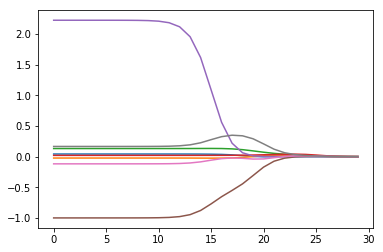

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeight)
# plt.xlim(0,20)
plt.show()

#### LASSO

计算复杂度高

#### Stagewise

In [108]:
def stageWise(xArr, yArr, eps=0.01, numIt=100):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    yMean = np.mean(yMat,0)
    yMat = yMat - yMean
    m,n = np.shape(xMat)
    returnMat = np.zeros((numIt,n))
    ws = np.zeros((n,1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):
        print(ws.T)
        lowerstError = np.inf
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps*sign
                yTest = xMat*wsTest
                rssE = rssError(yMat.A, yTest.A)
                if rssE < lowerstError:
                    lowerstError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T
    return returnMat    

In [109]:
xArr, yArr = loadDataSet("./Data/CH8/abalone.txt")

In [110]:
stageWise(xArr, yArr, 0.01, 200)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.   0.01 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.02 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.03 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.04 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.05 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.06 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.07 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.08 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.09 0.   0.   0.  ]]
[[0.  0.  0.  0.  0.1 0.  0.  0. ]]
[[0.   0.   0.   0.   0.11 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.12 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.13 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.14 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.15 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.16 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.17 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.18 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.19 0.   0.   0.  ]]
[[0.  0.  0.  0.  0.2 0.  0.  0. ]]
[[0.   0.   0.   0.   0.21 0.   0.   0.  ]]
[[0.   0.   0.   0.   0.22 0.   0.   0.  ]]
[[0.   0.   0.   0. 

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  , -0.79,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.8 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.8 ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [112]:
def regularize(xMat):#regularize by columns
    inMat = xMat.copy()
    inMeans = np.mean(inMat,0)   #calc mean then subtract it off
    inVar = np.var(inMat,0)      #calc variance of Xi then divide by it
    inMat = (inMat - inMeans)/inVar
    return inMat

In [113]:
xMat = np.mat(xArr)
yMat = np.mat(yArr).T
xMat = regularize(xMat)
yM = np.mean(yMat,0)
yMat = yMat - yM
weights = standRegres(xMat, yMat.T)
weights.T

matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
         -0.99895312, -0.11725427,  0.16622915]])

In [120]:
# def stageWiseTest(abX, abY):
#     xMat = np.mat(abX)
#     yMat = np.mat(abY).T
#     xMat = regularize(xMat)
#     yMat = regularize(yMat)
#     numTestPts = 30
#     wMat = np.zeros((numTestPts,np.shape(xMat)[1]))
#     for i in range(numTestPts):
#         ws = stageWise(xMat, yMat, np.exp(i-10),200)
#         wMat[i,:] = ws.T
#     return wMat

### Bias and Virance

- 方差☞模型之间的差异
- 偏差☞模型预测值和数据之间的差异

### EX : LEGO

数据接口变了，提供的是eBay的数据

#### CV

## Sklearn

### EX1 : Abalone

#### LinearRegression

In [221]:
X, y = loadDataSet('./Data/CH8/abalone.txt')

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [149]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y),test_size=0.2,random_state = 2018)
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
y_pred = clf.predict(X_test)
clf.coef_

array([  0.06026924,  -2.59687589,  11.9440577 ,  25.74179628,
         9.18727754, -19.827113  ,  -9.62773854,   6.15003366])

In [151]:
from sklearn.metrics import mean_squared_error

In [152]:
mean_squared_error(y_test,y_pred)

6.352735940932754

In [153]:
# R2
clf.score(X_test,y_test)

0.48671157752582356

#### RidgeRegression

In [208]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.1)
clf.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [209]:
y_pred = clf.predict(X_test)
mean_squared_error(y_test,y_pred)

6.179758120851155

In [210]:
clf.coef_

array([  0.05803489,  -1.4350165 ,  10.93750646,  23.01067895,
         8.84244114, -19.51056886,  -8.98434913,   6.82338736])

以上
- 增大Alpha，系数会衰减
- 下面用5折交叉验证

RidgeCV

In [211]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=(0.001,0.01,0.1),cv=5)
clf.fit(X_train, y_train)

RidgeCV(alphas=(0.001, 0.01, 0.1), cv=5, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [212]:
y_pred = clf.predict(X_test)
mean_squared_error(y_test,y_pred)

6.332078823180617

In [213]:
clf.alpha_

0.01

其实0.1最小，但是传0.001进去你看

#### LASSO

In [225]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)

In [226]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mean_squared_error(y_test,y_pred)

8.79519636205887

LassoCV

In [222]:
from sklearn.linear_model import LassoCV
clf = LassoCV(alphas=(0.01,0.01,0.1,1),cv=5,copy_X=True)

In [223]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mean_squared_error(y_test,y_pred)

5.882310490550318

In [224]:
clf.alpha_

0.01

## Refs

1. [Ridge](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_coeffs.html#sphx-glr-auto-examples-linear-model-plot-ridge-coeffs-py)